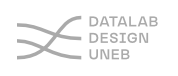

#Convertendo arquivos de rede para o Gephi Lite


Este notebook foi criado pelo Professor Elias Bitencourt como parte do material didático da disciplina de Métodos Digitais do curso de Design da Universidade do Estado da Bahia (UNEB). Ele tem como objetivo facilitar o processo de conversão de arquivos de rede no formato GDF para formatos compatíveis com o Gephi Lite, como GraphML e GEXF.

O código apresentado automatiza o processo de conversão, permitindo que os estudantes realizem suas análises de redes sem precisar de ferramentas complexas ou procedimentos manuais demorados. Para garantir o bom uso desse material, lembre-se de que ele é de uso restrito e não pode ser compartilhado sem autorização prévia do autor.


##Passo a Passo

1. Fazer o upload do arquivo GDF:
O primeiro passo é carregar o arquivo GDF que você deseja converter. Para isso, siga os passos abaixo:

* Execute o notebook.
* Quando solicitado, selecione o arquivo de rede (no formato .gdf) que está salvo no seu dispositivo.

2. Conversão automática: Após o upload, o código faz a conversão do arquivo automaticamente, realizando as seguintes ações:

* Analisa as colunas do arquivo de rede.
* Ajusta as informações de nó e aresta conforme as especificações.
* Gera o arquivo no formato escolhido (GraphML ou GEXF).

3. Baixar o arquivo convertido:
Uma vez que a conversão for concluída: O novo arquivo será disponibilizado para download diretamente no Google Colab.


*Se tiver qualquer dúvida, consulte o professor ou o material de suporte fornecido nas aulas.*


In [4]:
import pandas as pd
import networkx as nx
from google.colab import files
import os

def load_graph_from_file(file_path):
    """
    Carrega um arquivo de grafo e detecta o formato automaticamente (GDF, GEXF, ou GraphML).

    :param file_path: Caminho para o arquivo do grafo.
    :return: Um objeto Graph do NetworkX.
    """
    extension = os.path.splitext(file_path)[-1].lower()

    if extension == '.gdf':
        return load_gdf(file_path)
    elif extension == '.gexf':
        return nx.read_gexf(file_path)
    elif extension == '.graphml':
        return nx.read_graphml(file_path)
    else:
        raise ValueError("Formato de arquivo não suportado. Use GDF, GEXF ou GraphML.")

def load_gdf(gdf_file_path):
    """
    Converte um arquivo GDF em um objeto Graph do NetworkX.

    :param gdf_file_path: Caminho para o arquivo GDF.
    :return: Um objeto Graph do NetworkX.
    """
    with open(gdf_file_path, 'r') as file:
        lines = file.readlines()

    # Identificar linhas de definição de nós e arestas
    node_def_line_candidates = [i for i, line in enumerate(lines) if 'nodedef>' in line]
    if not node_def_line_candidates:
        raise ValueError("A seção de nós (nodedef) não foi encontrada no arquivo GDF.")
    node_def_line = node_def_line_candidates[0]
    nodes_start = node_def_line + 1

    edges_start = None
    for i, line in enumerate(lines):
        if 'edgedef>' in line:
            edges_start = i + 1
            break
    if edges_start is None:
        raise ValueError("A seção de arestas (edgedef) não foi encontrada no arquivo GDF.")

    # Carregar dados de nós e arestas
    node_columns = lines[node_def_line].strip().replace('nodedef>', '').split(',')
    nodes_data = [line.strip().split(',') for line in lines[nodes_start:edges_start - 1]]
    nodes_df = pd.DataFrame(nodes_data, columns=node_columns)

    edge_columns = lines[edges_start - 1].strip().replace('edgedef>', '').split(',')
    edges_data = [line.strip().split(',') for line in lines[edges_start:]]
    edges_df = pd.DataFrame(edges_data, columns=edge_columns)

    # Criar grafo e adicionar nós e arestas
    G = nx.Graph()
    node_id_column = node_columns[0]
    for _, row in nodes_df.iterrows():
        G.add_node(row[node_id_column], **row.to_dict())

    source_column = edge_columns[0]
    target_column = edge_columns[1]
    for _, row in edges_df.iterrows():
        G.add_edge(row[source_column], row[target_column], **{col: row[col] for col in edge_columns if col not in [source_column, target_column]})

    return G

def convert_graph_to_format(G, original_file_path, output_format='graphml'):
    """
    Converte um grafo NetworkX para o formato especificado.

    :param G: Objeto Graph do NetworkX.
    :param original_file_path: Caminho do arquivo original.
    :param output_format: Formato de saída desejado ('graphml' ou 'gexf').
    :return: Caminho para o arquivo convertido.
    """
    output_file = original_file_path.replace(os.path.splitext(original_file_path)[-1], f'.{output_format}')

    if output_format == 'graphml':
        nx.write_graphml(G, output_file)
    elif output_format == 'gexf':
        nx.write_gexf(G, output_file)
    else:
        raise ValueError("Formato de saída inválido. Escolha 'graphml' ou 'gexf'.")

    print(f"Arquivo convertido para {output_format} e salvo em: {output_file}")
    return output_file

def upload_and_convert(output_format='graphml'):
    """
    Realiza o upload de um arquivo de grafo e converte-o para o formato especificado.

    :param output_format: Formato de saída, pode ser 'graphml' ou 'gexf'.
    """
    uploaded = files.upload()  # Upload do arquivo de grafo
    for filename in uploaded.keys():
        G = load_graph_from_file(filename)
        converted_file = convert_graph_to_format(G, filename, output_format=output_format)
        files.download(converted_file)  # Baixar o arquivo convertido

#Chamando a função
upload_and_convert(output_format='graphml')  # Altere para 'gexf' se preferir GEXF


Saving videonet_channels_search50_nodes50_2024_10_31-18_10_13.gdf to videonet_channels_search50_nodes50_2024_10_31-18_10_13 (1).gdf
Arquivo convertido para graphml e salvo em: videonet_channels_search50_nodes50_2024_10_31-18_10_13 (1).graphml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>